<a href="https://colab.research.google.com/github/manod44/SDSS/blob/master/Distribui%C3%A7%C3%A3o_das_gal%C3%A1xias_com_dados_do_SDSS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeiramente vamos montar nosso google drive aqui no colab.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


# Agora importamos os módulos necessários para nossa análise de dados.
Dados obtidos do SDSS, (Sloan Digital Sky Survey). Disponível em: [skyserver.sdss.org](https://skyserver.sdss.org).

In [0]:
import pandas as pd # Responsável pelo processamento do arquivo .csv que analisaremos.
import numpy as np # Responsável pela algebra linear.
import seaborn as sb # Responsável por proporcionar uma interface de alto nível para construção de gráficos estatísticos.
import matplotlib.pyplot as plt # Responsável pela criação de gráficos em 2D.
from mpl_toolkits.mplot3d import Axes3D #Responsável pela criação de gráficos em 3D.
import requests 


# Abrindo e analisando nosso arquivo.
Nesta etapa vamos abrir nosso arquivo .csv e observaremos todos os dados que o compõe. E de agora pra frente o chamaremos de df, (Data Frame).

In [5]:
df = pd.read_csv('/content/drive/My Drive/Notebooks/Skyserver_12_30_2019_4_49_58PM.csv')
# endereço do arquivo: https://drive.google.com/open?id=1yqEwVXx14LOs725h4Lix05RjeqxF7ryz
df.head() # Comando para vizualizar nosso df. Por padrão nos mostra 5 linhas, mas podemos vizualizar mais utilizando df.head(n=x) 



,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


# Informações precisas do nosso df.
Para isso vamos vizualizar nosso df, utilizando o comando df.shape que nos resultara em algo do tipo (100000, 18), ou seja, 100000 linhas e 18 colunas. Porém é possível deixar mais didático.

In [6]:
print("Colunas:\t{}\nLinhas: \t{}".format(df.shape[1], df.shape[0]))

Colunas:	18
Linhas: 	100000


#Também é bom ver se algum dado está faltando. Assim podemos ver se nosso df e viavel ou não.


In [7]:
# Na frente de cada coluna irá aparecer o valor de dados ausentes.
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

Agora podemos ver o tamanho do nosso df, contendo 100000 linhas divididas em 18 colunas. 
É muito importante entender o que se está analisando, só assim seremos capazes de aplicar as melhores estratégias para se extrair o máximo de informações dos dados. Para isso vamos dar uma olhada no que significa cada coluna do nosso df.




*   **objid =** Número de identificação do objeto.



*   **ra =** Ascensão reta J2000 (banda r)
*   **dec =** Declinação J2000 (banda r)

**RA (ascensão reta) e DEC (declinação) são para o céu o que longitude e latitude são para a superfície da Terra. RA corresponde à direção leste / oeste, (como longitude), enquanto Dec mede as direções norte / sul, (como latitude).**


* **u =** melhor ajuste de magnitude DeV / Exp (banda u)

* **g =** melhor ajuste de magnitude DeV / Exp (banda g)

* **r =** melhor ajuste de magnitude DeV / Exp (banda r)

* **i =** melhor ajuste de magnitude DeV / Exp (banda i)

* **z =** melhor ajuste de magnitude DeV / Exp (banda z)

**A câmera do Sloan recebe luz de um objeto filtrado por um dos 5 filtros do sistema UGRIZ, assim é feita a fotometria das cores do objeto. Pode se entender mais em: https://www.sdss.org/dr12/algorithms/magnitudes/**



* **run =** Número de varredura. Número de varreduras completas feitas pela câmera.

* **rereun =** Número da nova execução. Houve vários reprocessamentos dos dados ao longo dos anos. Cada reprocessamento foi indicado por um número inteiro (o primeiro sendo reexecutado 0, o mais recente sendo reexecutado 301).

* **camcol =**  Coluna da câmera. A câmera SDSS tem seis colunas paralelas, o que significa que cada execução é dividida em seis linhas de varredura paralelas, uma para cada coluna da câmera. Essas imagens são conhecidas como câmeras de vídeo e são numeradas de 1 a 6.

* **field =** Número de campos. Cada camcol é dividido artificialmente em uma série de campos sobrepostos, cada um com 1489 pixels de comprimento (2048 pixels de largura). Cada campo se sobrepõe em 128 pixels aos campos adjacentes, para garantir que os objetos não sejam detectados incorretamente devido ao fato de estarem muito perto da borda de um campo. Os campos são a unidade básica de entrada de análise no pipeline de criação de imagens do SDSS.
* **specobjid =** Número exclusivo de identificação do objeto.
* **class =** Classe do objeto, (galáxia, estrela ou quasar).
* **redshift =** Redshift final.
* **plate =** Número inteiro indicando qual placa SDSS foi usada para coletar o espectro. O SDSS usou milhares de placas. São grandes placas de alumínio nas quais são feitos pequenos orifícios eada orifício tem uma fibra óptica conectada a ele. Cada buraco corresponde à localização do céu onde há um objeto, (uma estrela ou uma galáxia), para o qual o SDSS deseja medir um espectro.

* **mjd =** Corresponde a um número inteiro que denota a data juliana modificada da noite em que a observação foi realizada. Algumas placas foram observadas mais de uma vez, logo essas diferentes observações terão diferentes valores de MJD.
* **fiberid =** Corresponde a um número inteiro que indica o número da fibra.

**Para entender melhor o que cada coluna representa, e como é obtido cada dado acesse: https://www.sdss.org/**.

# Voltando
O nosso objetivo aqui é analisar e plotar gráficos referentes a localização das galáxias, e na coluna class podemos observar que existem dados de galáxias e estrelas. Assim podemos descartar todos os dados que não são de galáxias.

# Vamos então separar os dados que nos interessam.

In [8]:
df_galaxia = df.loc[(df['class']) == 'GALAXY']
df_galaxia.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74
5,1237668294987420000,178.334659,20.751715,15.44680,13.88656,13.06969,12.68676,12.42432,5313,301,6,125,2831738116518210000,GALAXY,0.020701,2515,54180,363
6,1237668294985060000,172.597478,20.552722,19.10002,17.10998,16.05751,15.63390,15.26723,5313,301,6,89,2812665437882440000,GALAXY,0.130948,2498,54169,609
7,1237668294984930000,172.309005,20.581135,16.89111,16.29741,16.25994,16.86333,16.77033,5313,301,6,87,2814772926945980000,GALAXY,0.004703,2500,54178,84


In [9]:
print("Colunas:\t{}\nLinhas: \t{}".format(df_galaxia.shape[1], df_galaxia.shape[0]))

Colunas:	18
Linhas: 	51323


Logo o que sobrou foram 51323 linhas do nosso df original, que continha 100000.

# Distribuição das Galáxias no espaço
  A ideia universo em expansão foi criada por Edwin Powell Hubble, que em 1929 estabeleceu a Lei de Hubble. O efeito Doppler nos diz que se um objeto se afasta de nós, o comprimento de onda da luz que ele emite aumenta, ou seja, é desviado para o vermelho, (redshift), já se ele se aproxima, o comprimento de onda diminui, ou seja, é desviado para o azul, (blueshift).  O desvio é maior se a velocidade for maior.
  Definimos o redshift (Z) como:
![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSw_6mmfmhzumcVWNDbUlJZx9Bv9ApaGG5NfANnCZW2dv3Bt2H2)

Lei de Hubble:


![](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTWVfKEueTsGnOxyCwLYtNxvRDSR-T45d1WOcHp7ElzHnJULPrA)

            




Também é preciso fazer uma relação entre coordenadas galácticas e equatoriais, assim podemos mapear a localização das galáxias. Para isso vamos utilizar o seguinte material de apoio: https://drive.google.com/open?id=1-jPQmARXEd2UnXH688Dpy3kUozMY0mKH


---
#-----------------------                    **Atenção**----------------------

---
# **É muito importante ler o material de apoio para entender o porque da criação de algumas colunas/variáveis, e das equações feitas a partir daqui.**







##Astropy
Guardei a importação deste próximo módulo que vamos utilizar porque queria dar uma descrição maior sobre ele. O Astropy é uma coleção de pacotes escritos em Python por membros de todo o mundo com um conjunto diversificado de habilidades, personalidades e experiências, ele é projetados para uso em astronomia e essencial para nossa análise

In [0]:
from astropy import units as u
from astropy.coordinates import SkyCoord as SC
from astropy.cosmology import WMAP9 as cosmo




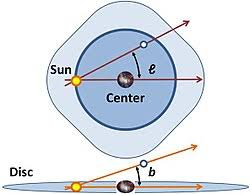


**As coordenadas galácticas aproximam-se de um sistema de coordenadas centralizado na localização do Sol.Os símbolos l e b correspondem,respectivamente, a longitude galáctica e latitude galáctica.**

In [11]:
#Criando nossas coordenadas.
ra_dec = SC(ra=df_galaxia['ra']*u.degree, dec=df_galaxia['dec']*u.degree, frame='icrs')

coord_galac = ra_dec.galactic

df_galaxia['l'] = coord_galac.l.value
df_galaxia['b'] = coord_galac.b.value

#Criando nossa distância
distancia = cosmo.comoving_distance(df_galaxia['redshift'])
df_galaxia['distância']= distancia.value



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

In [12]:
#Vamos ver se a inserção de novos dados foi bem sucedida.
print("Colunas:\t{}\nLinhas: \t{}".format(df_galaxia.shape[1], df_galaxia.shape[0]))

Colunas:	21
Linhas: 	51323


In [13]:
df_galaxia.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distância
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35,47.409503,82.432338,248.322383
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74,35.877567,72.209623,307.368909
5,1237668294987420000,178.334659,20.751715,15.44680,13.88656,13.06969,12.68676,12.42432,5313,301,6,125,2831738116518210000,GALAXY,0.020701,2515,54180,363,235.492130,75.287874,89.124486
6,1237668294985060000,172.597478,20.552722,19.10002,17.10998,16.05751,15.63390,15.26723,5313,301,6,89,2812665437882440000,GALAXY,0.130948,2498,54169,609,228.130237,70.365230,549.952839
7,1237668294984930000,172.309005,20.581135,16.89111,16.29741,16.25994,16.86333,16.77033,5313,301,6,87,2814772926945980000,GALAXY,0.004703,2500,54178,84,227.736447,70.128498,20.317840


# Agora vamos criar uma função para as coordenadas cartesianas.

In [14]:
#Criando agora as coordenadas (x, y, z) e adicionando ao df.
def cartesian(dist, alpha, delta):
    x = dist*np.cos(np.deg2rad(delta))*np.cos(np.deg2rad(alpha))
    y = dist*np.cos(np.deg2rad(delta))*np.sin(np.deg2rad(alpha))
    z = dist*np.sin(np.deg2rad(delta))
    return x,y,z

cart = cartesian(df_galaxia['distância'],df_galaxia['ra'],df_galaxia['dec'])
df_galaxia['x_coord'] = cart[0]
df_galaxia['y_coord'] = cart[1]
df_galaxia['z_coord'] = cart[2]

df_galaxia.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid,l,b,distância,x_coord,y_coord,z_coord
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35,47.409503,82.432338,248.322383,-202.902366,-78.799280,119.521166
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74,35.877567,72.209623,307.368909,-230.921596,-148.917071,137.748208
5,1237668294987420000,178.334659,20.751715,15.44680,13.88656,13.06969,12.68676,12.42432,5313,301,6,125,2831738116518210000,GALAXY,0.020701,2515,54180,363,235.492130,75.287874,89.124486,-83.307297,2.422066,31.578501
6,1237668294985060000,172.597478,20.552722,19.10002,17.10998,16.05751,15.63390,15.26723,5313,301,6,89,2812665437882440000,GALAXY,0.130948,2498,54169,609,228.130237,70.365230,549.952839,-510.656249,66.345521,193.071469
7,1237668294984930000,172.309005,20.581135,16.89111,16.29741,16.25994,16.86333,16.77033,5313,301,6,87,2814772926945980000,GALAXY,0.004703,2500,54178,84,227.736447,70.128498,20.317840,-18.849951,2.545597,7.142400


# Localização das Galáxias
Conhecendo as coordenadas cartesianas das galáxias, nós já podemos gerar um gráfico em 3 dimensões de seus devidos lugares no espaço. Tendo como referencia nosso Sol como ponto zero, já que a distancia dela da Terra, aonde está o telescópio é desprezável na escala astronomica Megaparsec (mpc).

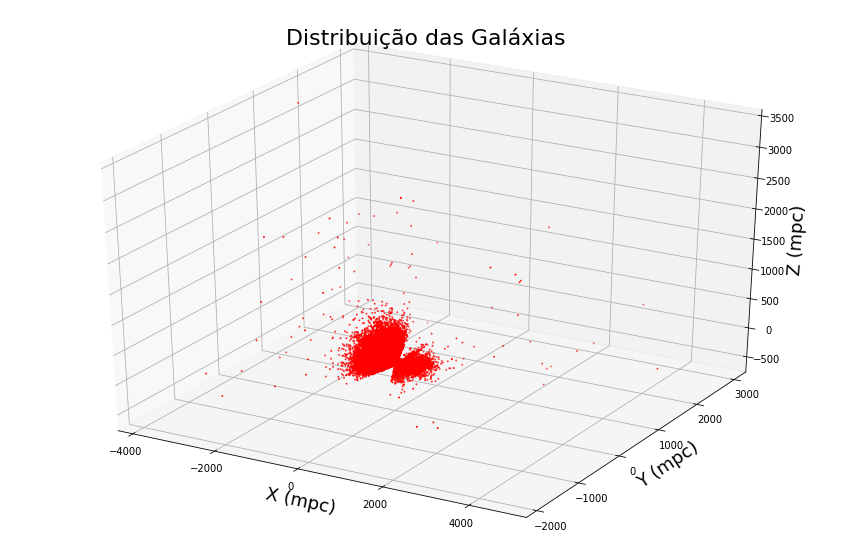

In [15]:

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_galaxia['x_coord'],df_galaxia['y_coord'],df_galaxia['z_coord'], color = 'r', s = 1)
ax.set_xlabel('X (mpc)', fontsize=18)
ax.set_ylabel('Y (mpc)', fontsize=18)
ax.set_zlabel('Z (mpc)', fontsize=18)
ax.set_title('Distribuição das Galáxias', fontsize=22)
plt.show()

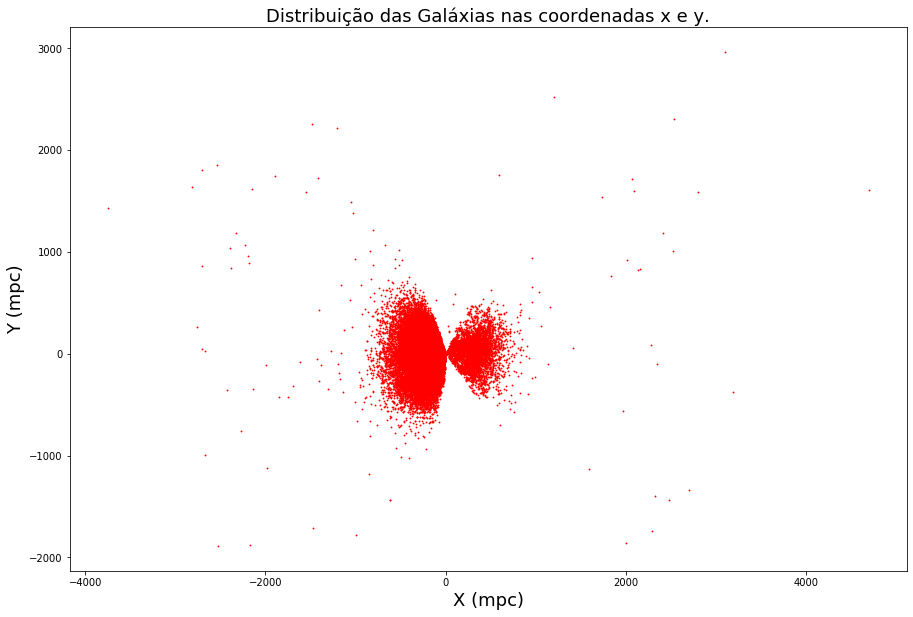

In [20]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(df_galaxia['x_coord'], df_galaxia['y_coord'], color = "r", s = 0.7)
ax.set_xlabel('X (mpc)', fontsize=18)
ax.set_ylabel('Y (mpc)', fontsize=18)
ax.set_title('Distribuição das Galáxias nas coordenadas x e y.',fontsize=18)
plt.show()

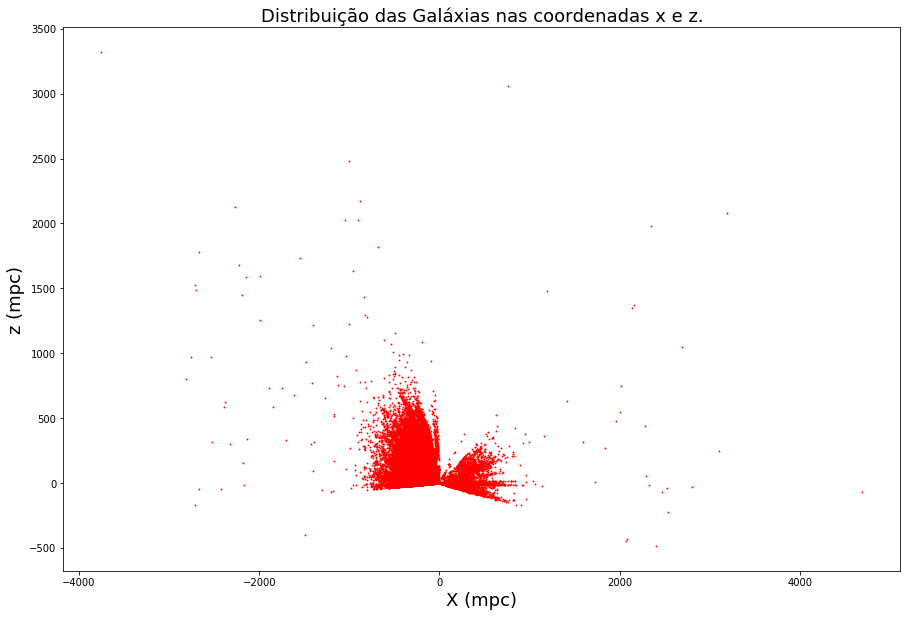

In [17]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(df_galaxia['x_coord'], df_galaxia['z_coord'], color = "r", s = 0.7)
ax.set_xlabel('X (mpc)', fontsize=18)
ax.set_ylabel('z (mpc)', fontsize=18)
ax.set_title('Distribuição das Galáxias nas coordenadas x e z.',fontsize=18)
plt.show()

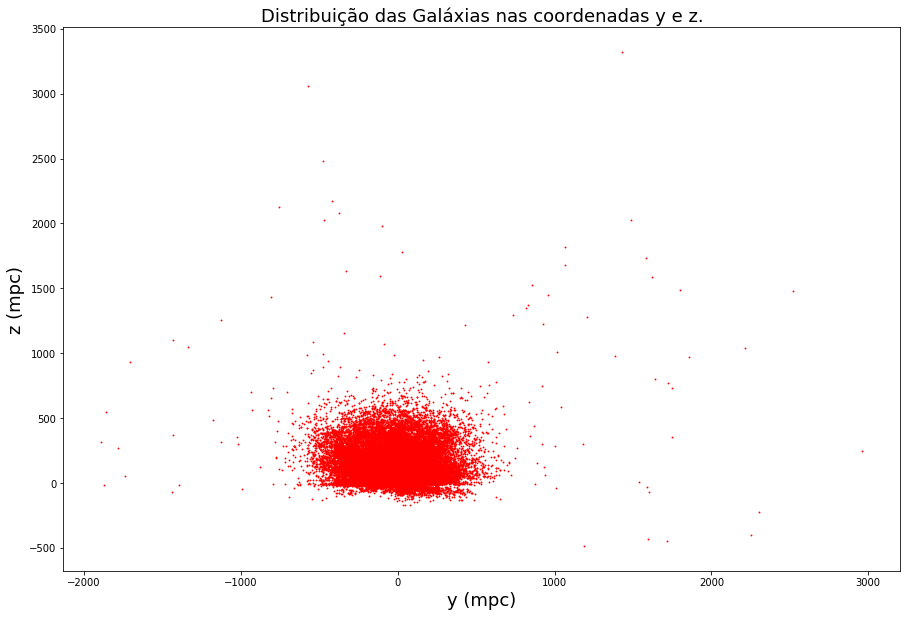

In [18]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(df_galaxia['y_coord'], df_galaxia['z_coord'], color = "r", s = 0.7)
ax.set_xlabel('y (mpc)', fontsize=18)
ax.set_ylabel('z (mpc)', fontsize=18)
ax.set_title('Distribuição das Galáxias nas coordenadas y e z.',fontsize=18)
plt.show()

# **Vamos também plotar o gráfico da distribução do Redshift comparando com o gráfico da distância.**

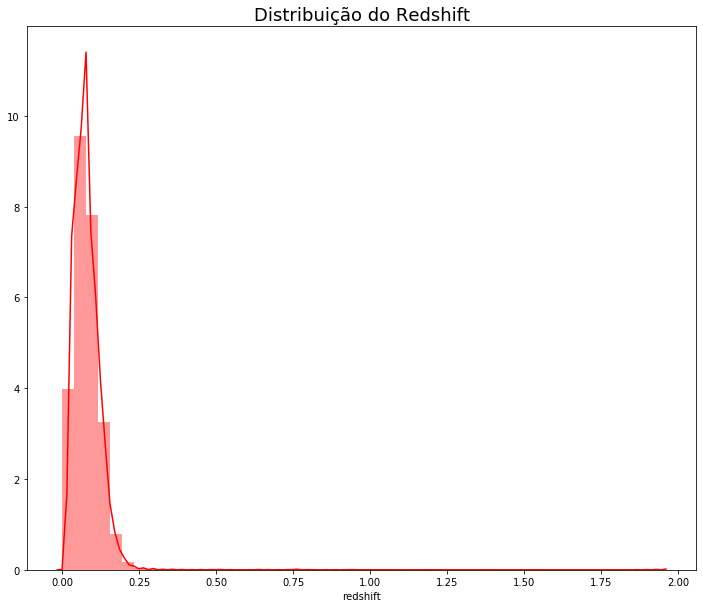

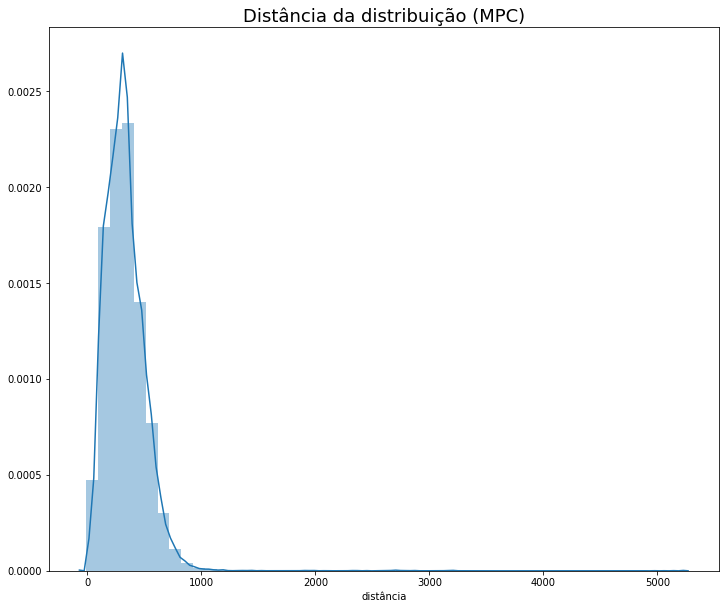

In [23]:
fig = plt.figure(figsize=(12,10))
sb.distplot(df_galaxia['redshift'], color="r")
plt.title('Distribuição do Redshift',fontsize=18)
plt.show()

fig = plt.figure(figsize=(12,10))
sb.distplot(df_galaxia['distância'])
plt.title('Distância da distribuição (MPC)',fontsize=18)
plt.show()

# **Por fim podemos ver também os valores de cada um, valores máximos, valores mínimos e média.**

In [24]:
df_galaxia['redshift'].describe()

count    51323.000000
mean         0.078092
std          0.048638
min         -0.002207
25%          0.047921
50%          0.073272
75%          0.100829
max          1.945427
Name: redshift, dtype: float64

In [25]:
df_galaxia['distância'].describe()

count    51323.000000
mean       329.671817
std        189.551988
min         -9.549097
25%        205.090441
50%        311.813244
75%        426.406818
max       5209.539858
Name: distância, dtype: float64